In [ ]:
 # This program uses the dual moving average crossover technical approach to determine when to buy & sell an underlying financial product

In [1]:
# import the libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [3]:
# store the data
TSLA = pd.read_csv('TSLA.csv')
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-14,262.100006,265.989990,260.510010,265.649994,265.649994,1907600
1,2015-07-15,266.739990,267.489990,262.079987,263.140015,263.140015,2021600
2,2015-07-16,264.220001,267.200012,263.160004,266.679993,266.679993,1616000
3,2015-07-17,272.500000,275.540009,268.250000,274.660004,274.660004,5004100
4,2015-07-20,275.000000,286.649994,272.540009,282.260010,282.260010,4978500
...,...,...,...,...,...,...,...
1254,2020-07-07,1405.010010,1429.500000,1336.709961,1389.859985,1389.859985,21489700
1255,2020-07-08,1405.000000,1417.260010,1311.339966,1365.880005,1365.880005,16311300
1256,2020-07-09,1396.989990,1408.560059,1351.280029,1394.280029,1394.280029,11717600
1257,2020-07-10,1396.000000,1548.920044,1376.010010,1544.650024,1544.650024,23337600


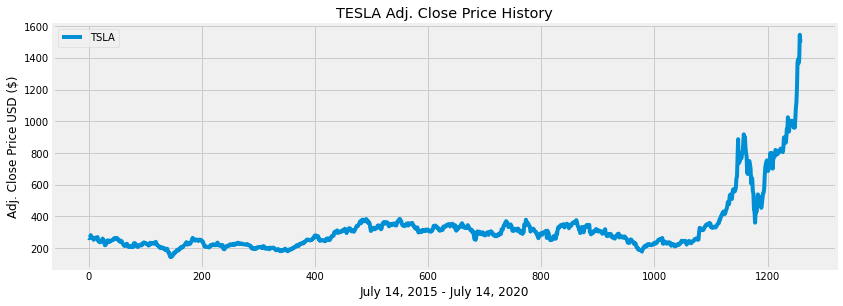

In [4]:
# visualize the data
plt.figure(figsize =(12.5, 4.5))
plt.plot(TSLA['Adj Close'], label = 'TSLA')
plt.title('TESLA Adj. Close Price History')
plt.xlabel('July 14, 2015 - July 14, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [5]:
# create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = TSLA['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,985.585669
1255,1003.819336
1256,1022.954338
1257,1047.582338


In [6]:
# create another simple moving average for 100 days
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = TSLA['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,774.517200
1255,780.136000
1256,786.078500
1257,792.941000


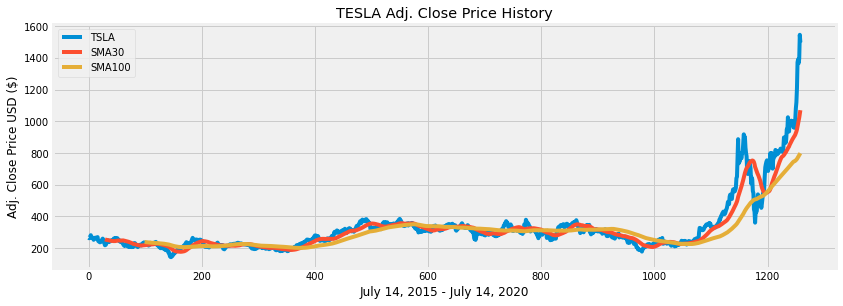

In [7]:
# visualize the data
plt.figure(figsize =(12.5, 4.5))
plt.plot(TSLA['Adj Close'], label = 'TSLA')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('TESLA Adj. Close Price History')
plt.xlabel('July 14, 2015 - July 14, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [8]:
# create a new dataframe to store all the data
data = pd.DataFrame()
data['TSLA']= TSLA['Adj Close']
data['SMA30']= SMA30['Adj Close']
data['SMA100']= SMA100['Adj Close']
data

,TSLA,SMA30,SMA100
0,265.649994,NaN,NaN
1,263.140015,NaN,NaN
2,266.679993,NaN,NaN
3,274.660004,NaN,NaN
4,282.260010,NaN,NaN
...,...,...,...
1254,1389.859985,985.585669,774.517200
1255,1365.880005,1003.819336,780.136000
1256,1394.280029,1022.954338,786.078500
1257,1544.650024,1047.582338,792.941000


In [9]:
# create a function to signal when to buy & sell the stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell= []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i]> data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['TSLA'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
          if flag !=0:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(data['TSLA'][i])
            flag = 0
          else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    else:
           sigPriceBuy.append(np.nan)
           sigPriceSell.append(np.nan)
      
  return (sigPriceBuy, sigPriceSell)

In [10]:
# store the buy & sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [11]:
# show the data
data

,TSLA,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,265.649994,NaN,NaN,NaN,NaN
1,263.140015,NaN,NaN,NaN,NaN
2,266.679993,NaN,NaN,NaN,NaN
3,274.660004,NaN,NaN,NaN,NaN
4,282.260010,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1254,1389.859985,985.585669,774.517200,NaN,NaN
1255,1365.880005,1003.819336,780.136000,NaN,NaN
1256,1394.280029,1022.954338,786.078500,NaN,NaN
1257,1544.650024,1047.582338,792.941000,NaN,NaN


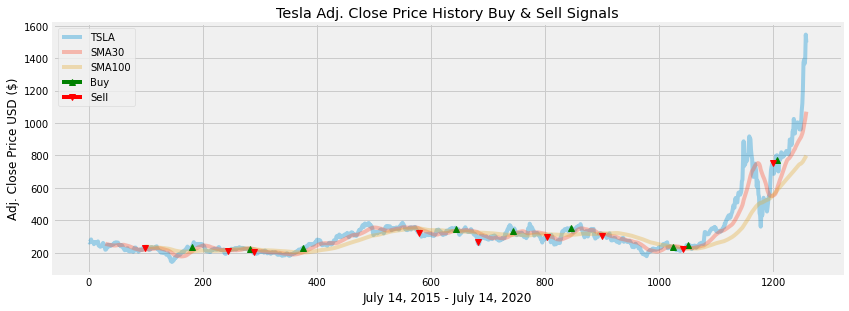

In [12]:
# visualize the data & the strategy to buy & sell the stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['TSLA'], label ='TSLA', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30',alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100',alpha = 0.35)
plt.plot(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.plot(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Tesla Adj. Close Price History Buy & Sell Signals')
plt.xlabel('July 14, 2015 - July 14, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()